In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
import math
from matplotlib.collections import PatchCollection

## Episodes learning

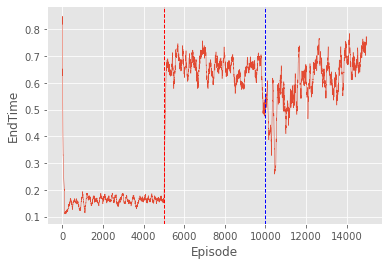

In [6]:
#plt.style.available
plt.style.use('ggplot')

df = pd.read_csv("episode.csv")
df["NormEndTime"] = df["EndTime"] / 500
df["mean_norm_end"] = df["NormEndTime"] .rolling(100, min_periods=5).mean()
#print(df)
pred_train = df["PredatorTraining"]
learner_change = np.where(np.roll(pred_train, -1) != pred_train)[0]
ax = df.plot(x="Episode", y="mean_norm_end", kind="line", lw=0.5, legend=False)
ax.set_ylabel("EndTime")
for i, x_l in enumerate(learner_change):
    if i%2 == 0:
        ax.axvline(x=x_l, color="red", linestyle='--', lw=1)
    else:
        ax.axvline(x=x_l, color="blue", linestyle='--', lw=1)

## New processing

In [104]:
def plot_policy(csv_file):
    df = pd.read_csv(csv_file)
    df_actual = df[df["Straight"]!=0.1]
    df_actual.reset_index(drop=True, inplace=True)
    m = df_actual.mean(axis=1)
    df_actual = df_actual.subtract(m,axis=0)
    for i in df_actual:
        df_actual[i] = np.exp(df_actual[i])

    s = df_actual.sum(axis=1)
    df_actual = df_actual.divide(s, axis=0)
    df_actual["y"] = df_actual["Straight"]
    df_actual["x"] = (df_actual["Right"] - df_actual["Left"])/2 + 0.5
    df = df_actual
    
    sec_num = len(df)
    fig, ax = plt.subplots()
    patches = []

    # add a wedge
    wedge = mpatches.Wedge((1, 1), 2, 0, 180, alpha=0.2, lw=1.5)
    patches.append(wedge)

    x = [2*math.cos(-math.pi/(sec_num-1)*i)+1 for i in range(1,sec_num-1)]
    y = [2*math.sin(math.pi/(sec_num-1)*i)+1 for i in range(1,sec_num-1)]

    for i in range(sec_num-2):
        ax.plot([1,x[i]],[1,y[i]], color="cornflowerblue", lw=0.3)


    t_p = np.array([[0,0], [1/2,math.sqrt(3)/2], [1,0]])*1/2  + np.array([3/4,1/2])

    # Simplex outside sectors
    t = mpatches.Polygon(t_p, alpha=0.2, lw=2)
    s_point = t_p[0] + np.array([df["x"][0]/2, df["y"][0]/2])
    ax.scatter(s_point[0], s_point[1], color="darkblue", s=5)
    #t = mpatches.Polygon(t_p, color="white", ec="black")
    patches.append(t)

    for i in range(1,sec_num):
        n_shift = 1.5*np.array([-math.cos(-i*math.pi/sec_num), math.sin(i*math.pi/sec_num)])
        t_coord = t_p + n_shift
        #print(t_coord[0])#
        #t = mpatches.Polygon(t_coord, color="white", ec="black", alpha=0.2, lw=2)
        t = mpatches.Polygon(t_coord, alpha=0.2, lw=2)
        #t_centre = np.array(t_coord[0] + np.array([1/4, 0.33/2]))
        s_point = t_coord[0] + np.array([df["x"][sec_num-i]/2, df["y"][sec_num-i]/2])
        ax.scatter(s_point[0], s_point[1], color="darkblue", s=5)
        #ax.scatter(s_point[0], s_point[1], color="black", s=5)
        #ax.plot(t_centre+np.array([df["x"][i], df["y"][i]]))
        patches.append(t)

    collection = PatchCollection(patches, match_original=True)
    ax.add_collection(collection)
    plt.axis('equal')
    plt.axis('off')
    #ax.plot([] , 'bo')
    plt.tight_layout()

    plt.show()

In [24]:
episodes_num = 5000
states_num = 2**5-1
index = ['Episode', 'State']
df = pd.read_csv("policy_evader.csv")
#Keep 0, 1, 4, 8, 16
df.set_index(index, inplace=True)
df[:,0]

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [4]:
def plot_policy(csv_file):
    df = pd.read_csv(csv_file)
    df_actual = df[df["Straight"]!=0.1]
    df_actual.reset_index(drop=True, inplace=True)
    m = df_actual.mean(axis=1)
    df_actual = df_actual.subtract(m,axis=0)
    for i in df_actual:
        df_actual[i] = np.exp(df_actual[i])

    s = df_actual.sum(axis=1)
    df_actual = df_actual.divide(s, axis=0)
    df_actual["y"] = df_actual["Straight"]
    df_actual["x"] = (df_actual["Right"] - df_actual["Left"])/2 + 0.5
    df = df_actual
    
    sec_num = len(df)
    fig, ax = plt.subplots()
    patches = []

    # add a wedge
    wedge = mpatches.Wedge((1, 1), 2, 0, 180, alpha=0.2, lw=1.5)
    patches.append(wedge)

    x = [2*math.cos(-math.pi/(sec_num-1)*i)+1 for i in range(1,sec_num-1)]
    y = [2*math.sin(math.pi/(sec_num-1)*i)+1 for i in range(1,sec_num-1)]

    for i in range(sec_num-2):
        ax.plot([1,x[i]],[1,y[i]], color="cornflowerblue", lw=0.3)


    t_p = np.array([[0,0], [1/2,math.sqrt(3)/2], [1,0]])*1/2  + np.array([3/4,1/2])

    # Simplex outside sectors
    t = mpatches.Polygon(t_p, alpha=0.2, lw=2)
    s_point = t_p[0] + np.array([df["x"][0]/2, df["y"][0]/2])
    ax.scatter(s_point[0], s_point[1], color="darkblue", s=5)
    #t = mpatches.Polygon(t_p, color="white", ec="black")
    patches.append(t)

    for i in range(1,sec_num):
        n_shift = 1.5*np.array([-math.cos(-i*math.pi/sec_num), math.sin(i*math.pi/sec_num)])
        t_coord = t_p + n_shift
        #print(t_coord[0])#
        #t = mpatches.Polygon(t_coord, color="white", ec="black", alpha=0.2, lw=2)
        t = mpatches.Polygon(t_coord, alpha=0.2, lw=2)
        #t_centre = np.array(t_coord[0] + np.array([1/4, 0.33/2]))
        s_point = t_coord[0] + np.array([df["x"][sec_num-i]/2, df["y"][sec_num-i]/2])
        ax.scatter(s_point[0], s_point[1], color="darkblue", s=5)
        #ax.scatter(s_point[0], s_point[1], color="black", s=5)
        #ax.plot(t_centre+np.array([df["x"][i], df["y"][i]]))
        patches.append(t)

    collection = PatchCollection(patches, match_original=True)
    ax.add_collection(collection)
    plt.axis('equal')
    plt.axis('off')
    #ax.plot([] , 'bo')
    plt.tight_layout()

    plt.show()

In [ ]:
plot_policy("policy_pursuer.csv")

KeyboardInterrupt: 

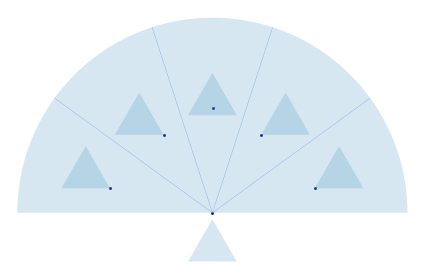

In [106]:
plot_policy("policy_evader.csv")

In [13]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [39]:
## Old processing

In [ ]:
plt.style.use('fivethirtyeight')
df = pd.read_csv("policy.csv")
df_actual = df[df["Straight"]!=0.1]
s = df_actual.sum(axis=1)
df_actual = df_actual.divide(s, axis="index")
#df_actual

#Isometric projection
df_actual["Left"] = df_actual["Left"]*math.sqrt(3)/2
df_actual["Right"] = df_actual["Right"]*math.sqrt(3)/2
#m = df_actual.min(axis=1)
#df_actual = df_actual.subtract(m, axis="index")
df_actual["dx"] = df_actual["Right"] - df_actual["Left"]
df_actual["dy"] = df_actual["Straight"]
df = df_actual
df.reset_index(drop=True, inplace=True)
df

In [ ]:
fig, ax = plt.subplots()
patches = []

# add a wedge
wedge = mpatches.Wedge((1, 1), 2, 0, 180, color="white", ec="black")
patches.append(wedge)

x = [2*math.cos(-math.pi/5*i)+1 for i in range(1,5)]
y = [2*math.sin(math.pi/5*i)+1 for i in range(1,5)]

for i in range(4):
    ax.plot([1,x[i]],[1,y[i]], color="black")

# add an arrow
arrow = mpatches.Arrow(1, 0, df["dx"][0], df["dy"][0], width=0.05, color="black")
patches.append(arrow)
    
for i in range(1,len(df_actual)):
    arrow = mpatches.Arrow((i-1)*0.5, 1.3 + 0.5*math.sin(math.pi/4*(i-1)), 
                           df["dx"][6-i], df["dy"][6-i], width=0.05, color="black")
    patches.append(arrow)

collection = PatchCollection(patches, match_original=True)
ax.add_collection(collection)
plt.axis('equal')
plt.axis('off')
#ax.plot([] , 'bo')
plt.tight_layout()

plt.show()